 <a id='TOC'></a>
## Statistical Analysis - Table of Contents


#### 1. <a href='#ReadWrangledDataset'>Read wrangled dataset</a>
#### 2. <a href='#ImportPackages'>Import required packages</a>
#### 3. <a href='#setPlotProps'>Set default plot properties</a>
#### 3. <a href='#defineFunctions'>Define functions</a>
#### 4. <a href='#stat'>Statistical Analysis</a>

 <a id='ReadWrangledDataset'></a>
 #### Read wrangled dataset
 <a href='#TOC'>Table Of Contents</a>

In [1]:
# Read the wrangled dataset from another jupyter notebook
%store -r flipkart_df

 <a id='ImportPackages'></a>
 #### Import required packages
 <a href='#TOC'>Table Of Contents</a>

In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 <a id='setPlotProps'></a>
 #### Set default plot properties
 <a href='#TOC'>Table Of Contents</a>

In [3]:
# setting default plot properties
sns.set(style="whitegrid")
_ = plt.rcParams["figure.figsize"] = (12,8)

 <a id='defineFunctions'></a>
#### Define functions
 <a href='#TOC'>Table Of Contents</a>

In [4]:
# Empirical cummulative distribution function
def ecdf(data):
    ''' Compute ECDF for a one-dimensional array of measurements. '''
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [5]:
# Plot the ecdf
def plot_ecdf(data, label_name):
    ''' Plot the ECDF for one-dimensional array '''
    x, y = ecdf(data)
    _ = plt.plot(x, y, marker='.', linestyle='none', label=label_name)
    _ = plt.title("Empirical CDF")
    _ = plt.xlabel("Price")
    _ = plt.ylabel("ECDF")
    _ = plt.legend()

In [6]:
# Bootstrap Sampling
def bootstrap_replicates(x,func,size=10000):
    ''' Calculate the bootstrap replicates for a one-dimensional array '''
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(x,size=len(x))
        bs_replicates[i] = func(bs_sample)
    return bs_replicates

In [7]:
# Permutation sample
def perm_sample(x,y):
    ''' Compute a permutation sample for two one-dimensional arrays'''
    con=np.concatenate((x,y))
    perm=np.random.permutation(con)
    perm_x=perm[:len(x)]
    perm_y=perm[len(x):]
    return perm_x,perm_y

In [8]:
# Plot the ecdf
def plot_perm_ecdf(x_org_0,x_org_1,size=100) :
    for _ in range(size):
        perm0,perm1=perm_sample(x_org_0,x_org_1)
        x_0,y_0 = ecdf(perm0)
        x_1,y_1 = ecdf(perm1)
        _ = plt.plot(x_0,y_0,marker='.',linestyle='none',alpha=0.4)
        _ = plt.plot(x_1,y_1,marker='.',linestyle='none',alpha=0.4)

<a id='stat'></a>
####  Is the discount price distribution same for FK_Advantage products vs non FK_advantage products ?
As we are concerned about the distribution of the values - we can perform a bootstrap

permutation test to find if there is really a difference in distributions?

Null Hypothesis: Both have identical discount price distributions

Alternate Hypothesis: There's a difference in Discount price distributions

##### Verify if both have the identical distributions using Bootstrapping & Hypothesis testing.

 <a href='#TOC'>Table Of Contents</a>


In [9]:
# Considering top 4 categories - with highest number of products
pd=flipkart_df.product_category.value_counts().sort_values(ascending=False).head(4)
pd.to_frame().head()

,product_category
Clothing,6290
Jewellery,3588
Footwear,1260
Mobiles & Accessories,1099


In [10]:
# Extracting top 4 categories as list
top_4_categories = list(pd.index)

In [11]:
# Extracting dataframes specific to each category from wrangled dataset(flipkart_df)
def get_category_df(list):
    ''' Get dataframes specific to each category '''
    return [flipkart_df[flipkart_df.product_category == i] for i in list]

In [12]:
clothing_df,jewellery_df,footwear_df,mobiles_df = get_category_df(top_4_categories)

In [13]:
clothing_df = flipkart_df[flipkart_df.product_category == 'Clothing']

# FK_Advantage_product
clothing_df_1 = clothing_df[clothing_df.is_FK_Advantage_product]

# Non FK_Advantage_product
clothing_df_0 = clothing_df[clothing_df.is_FK_Advantage_product == False]

# Counts of advantage vs non-advantage
clothing_df_1.shape,clothing_df_0.shape

((341, 15), (5949, 15))

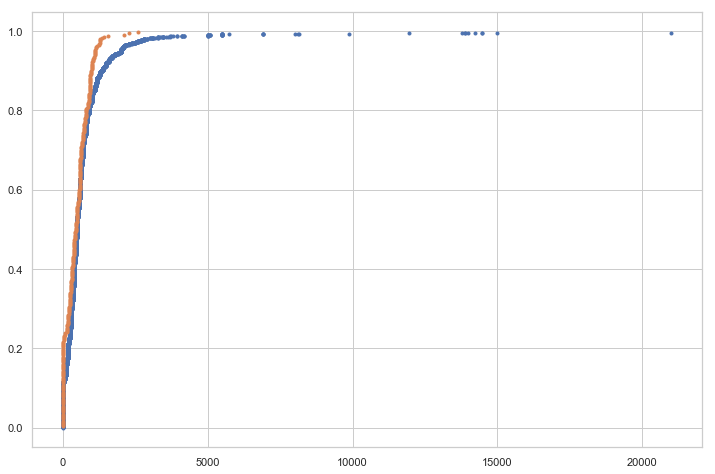

In [14]:
# Calculate the ecdfs from observed data
x_org_0,y_org_0 = ecdf(clothing_df_0.discounted_price)
x_org_1,y_org_1 = ecdf(clothing_df_1.discounted_price)

# Plot the original ecdfs based on observed data
_= plt.plot(x_org_0,y_org_0,marker='.',linestyle='none')
_= plt.plot(x_org_1,y_org_1,marker='.',linestyle='none')


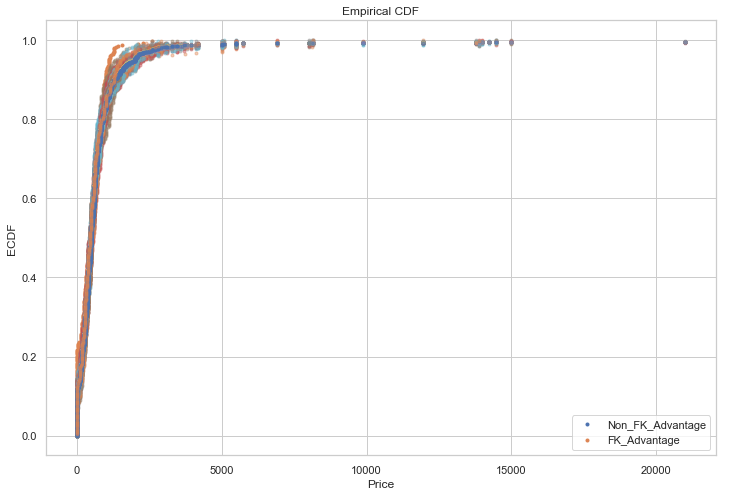

In [15]:
# plot the original ecdfs
plot_ecdf(clothing_df_0.discounted_price,label_name='Non_FK_Advantage')
plot_ecdf(clothing_df_1.discounted_price,label_name='FK_Advantage')

# calculate and plot the cdf from permutation samples
plot_perm_ecdf(clothing_df_0.discounted_price,clothing_df_1.discounted_price)

Notice how the permutation sample ECDF's overlap with the observed data, suggesting that the 
hypothesis is commensurate with the data - Discount prices for flipkart advantage products
and non flipkart advantage products are identically distributed.

#### Does discount_price and retail_price positively correlated?

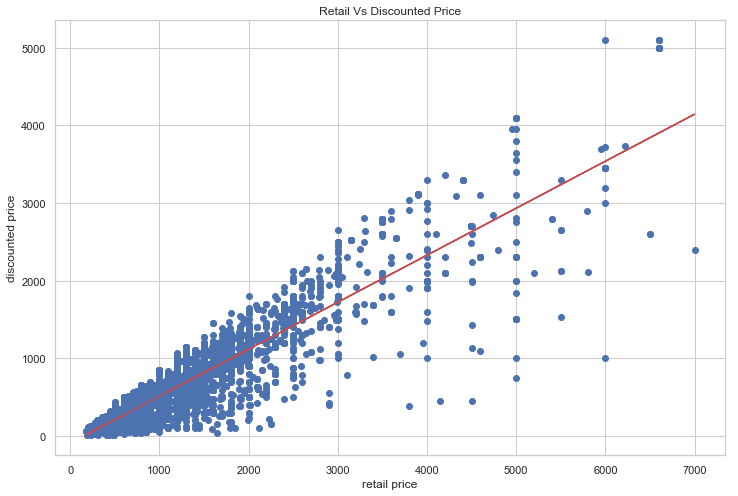

In [16]:
# Identifying a linear model

# Excluding the outliers
clothing_df=clothing_df[clothing_df.retail_price < 7000] 

# Plotting only discounted products
scatter_df = clothing_df[clothing_df.discounted_price > 0.0] 
_ = plt.scatter(scatter_df.retail_price,scatter_df.discounted_price)

# Calculate a linear regression with least squares regression : np.polyfit
slope,intercept = np.polyfit(scatter_df.retail_price,scatter_df.discounted_price,1)

# Plot the regression line
_ = plt.plot(scatter_df.retail_price, slope * scatter_df.retail_price + intercept,linestyle='-',color='r' )

# label the axis
_ = plt.xlabel('retail price')
_ = plt.ylabel('discounted price')
_ = plt.title('Retail Vs Discounted Price')

In [17]:
# TO DO
# Pairs bootstrap for a linear regression
#Resammple data in paids

In [18]:
# TO DO
# Test - statistic = are the two prices identical ? Meaning - both the kinds 
# have the same mean retail price for clothing category.
# for both FK and non FK
